In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

In [2]:
# read and save the data as dt
dt = pd.read_csv("../data/data.txt", header=None)
dt.head()

,0
0,[WED] [JAN] [False] [180] 1-1-1800
1,[THU] [JAN] [False] [180] 1-1-1801
2,[FRI] [JAN] [False] [180] 1-1-1802
3,[SAT] [JAN] [False] [180] 1-1-1803
4,[SUN] [JAN] [True] [180] 1-1-1804


In [3]:
month_dict = {"[JAN]": 1,
              "[FEB]": 2,
              "[MAR]": 3,
              "[APR]": 4,
              "[MAY]": 5,
              "[JUN]": 6,
              "[JUL]": 7,
              "[AUG]": 8,
              "[SEP]": 9,
              "[OCT]": 10,
              "[NOV]": 11,
              "[DEC]": 12}

weekday_dict = {"[MON]": 0,
                "[TUE]": 1,
                "[WED]": 2,
                "[THU]": 3,
                "[FRI]": 4,
                "[SAT]": 5,
                "[SUN]": 6}


def days_valid(year, month, day):
    return [dat[2] for dat in list(calendar.Calendar(firstweekday=0).itermonthdays4(year, month)) if ((dat[1]==month) and (dat[3]==day))]

def valid_year_day_(df):
    '''this function is to return the valid years as dictionary keys and the coresponding valid days list for each valid year'''
    
    valid_year_day = []
    for row in range(df.shape[0]):
        decade = df.iloc[row, 3]
        month = df.iloc[row, 1]
        day = df.iloc[row, 0]
        leap_dict = {}
        # logic in case leap_year_condition True########################################  
        if df.iloc[row, 2]==1:
            for i in range(10):
                year = decade*10+i
                if year%4==0:
                    if year%100==0:
                        if year%400==0:
                            leap_dict[i] = days_valid(year, month, day)
                    else: 
                        leap_dict[i] = days_valid(year, month, day)
        
        # logic in case leap_year_condition False#######################################
        else:
            for i in range(10):
                year = decade*10+i
                if year%4==0:
                    if year%100==0:
                        if year%400!=0:
                            leap_dict[i] = days_valid(year, month, day)
                else: 
                    leap_dict[i] = days_valid(year, month, day)
        valid_year_day += [leap_dict]
            # [leap(df.loc[i, "decade"]) if df.loc[i, "leap_year_condition"]==1 else {j:days_valid(year, month, day) for j in list(range(10)) if j not in leap(df.loc[i, "decade"])}  for i in range(df.shape[0])]
    return valid_year_day

# df = pd.get_dummies(df, columns=["weekday_name"], prefix="weekday")
# df["leap_years"] = [leap(row.split()[3].strip("[]")) for row in dt[0]]
# df["days"] = [[i if .weekday()==weekday_dict[row.split()[0]] for i in range(1,calendar.monthrange(year, month)[1])] for row in dt[0]]
# calendar.monthrange(year, month)[1]

In [4]:
# splitting every line to columns and modify some columns shape
df = pd.DataFrame()
# df["weekday_name"] = [weekday_dict[row.split()[0]] for row in dt[0]]
df["weekday_name"] = [weekday_dict[row.split()[0]] for row in dt[0]]
df["month"] = [month_dict[row.split()[1]] for row in dt[0]]
df["leap_year_condition"] = [0 if row.split()[2]=="[False]" else 1 for row in dt[0]]
df["decade"] = [int(row.split()[3].strip("[]")) for row in dt[0]]
df["output"] = [row.split()[4].strip("[]") for row in dt[0]]
df["output_year_digit"] = [int(row.split()[4].strip("[]")[-1]) for row in dt[0]]
df["output_year"] = [int(row.split()[4].strip("[]")[-4:]) for row in dt[0]]
df["output_day"] = [int(row.split()[4].strip("[]")[0]) for row in dt[0]]
df["valid_years_days_dict"] = valid_year_day_(df)
df["valid_years_list"] = [i+[*[i[0]]*(8-len(i))]for i in [list(item.keys())for item in df["valid_years_days_dict"]]]
df["valid_day_list"] = [dic[key] for dic, key in zip(df["valid_years_days_dict"], df["output_year_digit"])]
df.head(7)

,weekday_name,month,leap_year_condition,decade,output,output_year_digit,output_year,output_day,valid_years_days_dict,valid_years_list,valid_day_list
0,2,1,0,180,1-1-1800,0,1800,1,"{0: [1, 8, 15, 22, 29], 1: [7, 14, 21, 28], 2:...","[0, 1, 2, 3, 5, 6, 7, 9]","[1, 8, 15, 22, 29]"
1,3,1,0,180,1-1-1801,1,1801,1,"{0: [2, 9, 16, 23, 30], 1: [1, 8, 15, 22, 29],...","[0, 1, 2, 3, 5, 6, 7, 9]","[1, 8, 15, 22, 29]"
2,4,1,0,180,1-1-1802,2,1802,1,"{0: [3, 10, 17, 24, 31], 1: [2, 9, 16, 23, 30]...","[0, 1, 2, 3, 5, 6, 7, 9]","[1, 8, 15, 22, 29]"
3,5,1,0,180,1-1-1803,3,1803,1,"{0: [4, 11, 18, 25], 1: [3, 10, 17, 24, 31], 2...","[0, 1, 2, 3, 5, 6, 7, 9]","[1, 8, 15, 22, 29]"
4,6,1,1,180,1-1-1804,4,1804,1,"{4: [1, 8, 15, 22, 29], 8: [3, 10, 17, 24, 31]}","[4, 8, 4, 4, 4, 4, 4, 4]","[1, 8, 15, 22, 29]"
5,1,1,0,180,1-1-1805,5,1805,1,"{0: [7, 14, 21, 28], 1: [6, 13, 20, 27], 2: [5...","[0, 1, 2, 3, 5, 6, 7, 9]","[1, 8, 15, 22, 29]"
6,2,1,0,180,1-1-1806,6,1806,1,"{0: [1, 8, 15, 22, 29], 1: [7, 14, 21, 28], 2:...","[0, 1, 2, 3, 5, 6, 7, 9]","[1, 8, 15, 22, 29]"


**Exploratory Data Analysis**

- **the data is already normalized**

In [5]:
df.isna().sum()

weekday_name             0
month                    0
leap_year_condition      0
decade                   0
output                   0
output_year_digit        0
output_year              0
output_day               0
valid_years_days_dict    0
valid_years_list         0
valid_day_list           0
dtype: int64

- **there is no null values to impute**

In [6]:
df.dtypes

weekday_name              int64
month                     int64
leap_year_condition       int64
decade                    int64
output                   object
output_year_digit         int64
output_year               int64
output_day                int64
valid_years_days_dict    object
valid_years_list         object
valid_day_list           object
dtype: object

In [7]:
df.shape

(146462, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146462 entries, 0 to 146461
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   weekday_name           146462 non-null  int64 
 1   month                  146462 non-null  int64 
 2   leap_year_condition    146462 non-null  int64 
 3   decade                 146462 non-null  int64 
 4   output                 146462 non-null  object
 5   output_year_digit      146462 non-null  int64 
 6   output_year            146462 non-null  int64 
 7   output_day             146462 non-null  int64 
 8   valid_years_days_dict  146462 non-null  object
 9   valid_years_list       146462 non-null  object
 10  valid_day_list         146462 non-null  object
dtypes: int64(7), object(4)
memory usage: 12.3+ MB


In [9]:
df.describe()

,weekday_name,month,leap_year_condition,decade,output_year_digit,output_year,output_day
count,146462.000000,146462.000000,146462.000000,146462.000000,146462.000000,146462.000000,146462.000000
mean,2.999993,6.523030,0.242397,199.551146,4.488536,2000.000000,2.607816
std,2.000002,3.448687,0.428535,11.574208,2.877427,115.757992,2.154291
min,0.000000,1.000000,0.000000,180.000000,0.000000,1800.000000,1.000000
25%,1.000000,4.000000,0.000000,190.000000,2.000000,1900.000000,1.000000
50%,3.000000,7.000000,0.000000,200.000000,4.000000,2000.000000,2.000000
75%,5.000000,10.000000,0.000000,210.000000,7.000000,2100.000000,3.000000
max,6.000000,12.000000,1.000000,220.000000,9.000000,2200.000000,9.000000


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

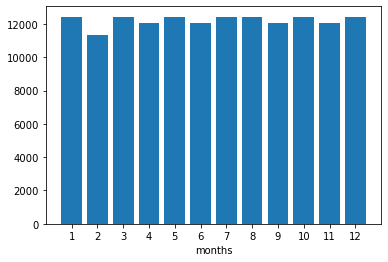

In [10]:
plt.bar(df.month.value_counts().index, df.month.value_counts())
plt.xlabel("months")
plt.xticks(list(range(1, 13)))
list(range(1, 13))

**the months distribution is balanced**

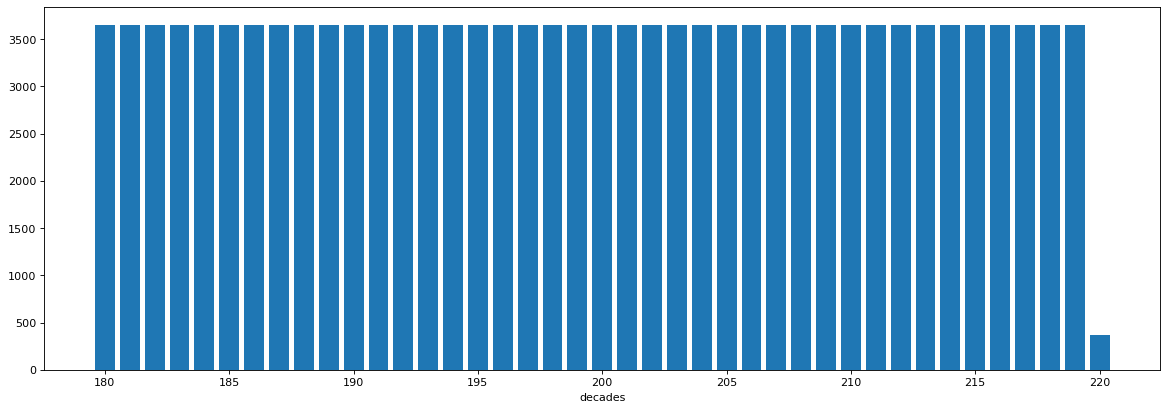

In [11]:
from matplotlib.pyplot import figure #https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib
figure(figsize=(18, 6), dpi=80)
plt.bar(df.decade.value_counts().index, df.decade.value_counts())
plt.xlabel("decades")
plt.show()
# plt.xticks((df.decade.nunique()))

**data of decades is ideally balanced except for "220" decade**

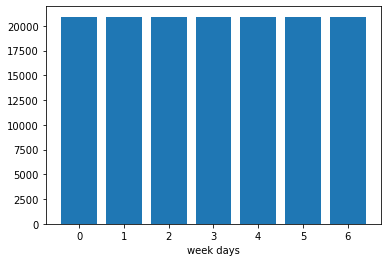

In [12]:
plt.bar(df.weekday_name.value_counts().index, df.weekday_name.value_counts())
plt.xlabel("week days")
plt.show()

**also the weekdays distribution is ideally balanced**

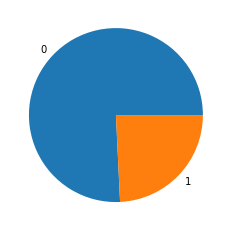

In [13]:
plt.pie(df["leap_year_condition"].value_counts(), labels=df["leap_year_condition"].value_counts().index)
plt.show()

**also non leap years is three times number of leap years**

In [14]:
df.to_csv("../data/data.csv", header=True, index=False)